![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Imbalanced data

We will be using the `files_for_lab/customer_churn.csv` dataset to build a churn predictor.

### Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.
3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')
4. Build the logistic regression model.
5. Evaluate the model.
6. Even a simple model will give us more than 70% accuracy. Why?
7. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import my_functions


In [3]:
# Load the dataset
df = pd.read_csv('files_for_lab/customer_churn.csv')

# Format column names
df = my_functions.format_column_names(df)

# Explore the variables
display(df.head())
display(df.describe())

# Explore category balance for target variable
df['churn'].value_counts()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


No     5174
Yes    1869
Name: churn, dtype: int64

In [4]:
# Split dataset into X and y
X = df[['tenure','senior_citizen','monthly_charges']]

# Replace Yes = 1 and No = 0
replacements = { 'Yes':1, 'No':0}
y = df['churn'].replace(replacements)
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [5]:
# Generate the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

In [6]:
# Add columns to X_train and X_test and transform into DataFrame
X_train = pd.DataFrame(X_train, columns = X.columns, index=X_train.index)
X_test  = pd.DataFrame(X_test,  columns = X.columns, index=X_test.index)

In [7]:
# Select Logistic Regression model
model = LogisticRegression(random_state=0, solver='lbfgs')

# Fit the model with the train data
model.fit(X_train, y_train)

print("The accuracy of the model in the TEST set is: {:.2f}".format(model.score(X_test, y_test)))

The accuracy of the model in the TEST set is: 0.79


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = model.predict(X_test)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.79
The precision in the TEST set is: 0.62
The recall in the TEST set is: 0.48
The F1 in the TEST set is: 0.54
The Kappa in the TEST set is: 0.41


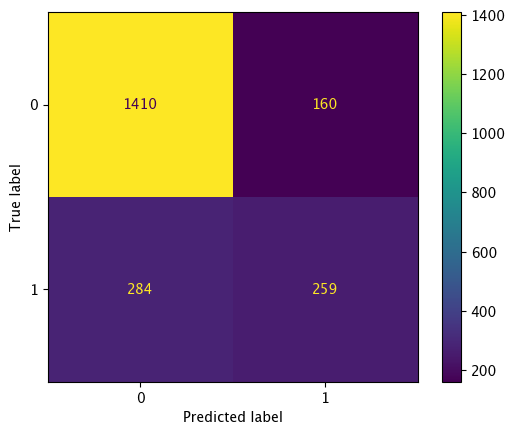

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp.plot()
plt.show()

In [11]:
# Apply Synthetic Minority Oversampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

y_train_SMOTE.value_counts()


0    3604
1    3604
Name: churn, dtype: int64

In [12]:
# Select Logistic Regression model again, after applying SMOTE
model_after_smote = LogisticRegression(random_state=0, solver='lbfgs')

model_after_smote.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_test = model_after_smote.predict(X_test)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.71
The precision in the TEST set is: 0.46
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.56
The Kappa in the TEST set is: 0.36


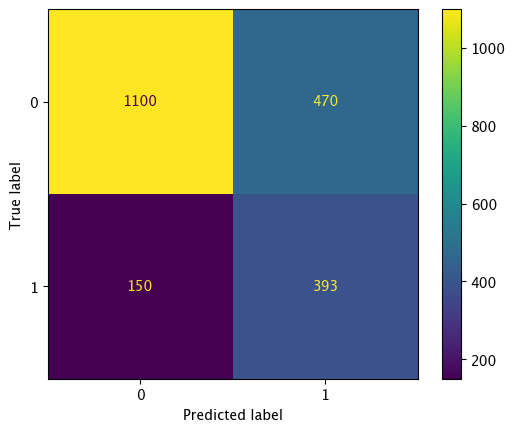

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model_after_smote.classes_)
disp.plot()
plt.show()

+ The comparison of the two outputs suggests that the use of SMOTE has led to some changes in the performance of the model. Here's a breakdown of what each metric means and how the changes might be interpreted:

+ Accuracy: This is the proportion of total predictions that are completely correct. The accuracy has decreased from 0.79 to 0.71 after using SMOTE, which means the model is correctly predicting fewer instances overall.

+ Precision: This is the proportion of positive predictions that are actually correct. The precision has decreased from 0.62 to 0.46 after using SMOTE, which means that of all the instances the model is predicting as positive, fewer of them are actually positive.

+ Recall: This is the proportion of actual positive instances that the model correctly identified. The recall has increased from 0.48 to 0.72 after using SMOTE, which means the model is now correctly identifying a greater proportion of positive instances.

+ F1 Score: This is the harmonic mean of precision and recall and provides a balance between them. The F1 score has slightly increased from 0.54 to 0.56 after using SMOTE, suggesting that the balance between precision and recall has improved slightly.

+ Kappa: This is a measure of how much better the predictions of the model are compared to predictions made by chance. The Kappa has decreased from 0.41 to 0.36 after using SMOTE, suggesting that the model's predictions are closer to what would be expected by chance.

+ In conclusion, the use of SMOTE has led to a model that is better at identifying positive instances (as indicated by the increase in recall), but at the cost of making more incorrect predictions (as indicated by the decrease in precision and accuracy). This might be acceptable if the cost of missing a positive instance is high.